# Neural Network

In [1]:
import tensorflow as tf
from sklearn import metrics
import keras
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

Using TensorFlow backend.


In [8]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)/255.0
x_test = x_test.reshape(10000,784)/255.0

In [82]:
digits = list(range(10))
x_train_1000, y_train_1000 = [], []
x_test_1000, y_test_1000 = [], []

train_1000 = None
test_1000 = None

d1 = None
d2 = None

Train1 = np.append(x_train, y_train.reshape(len(y_train), 1), axis = 1)
Test1 = np.append(x_test, y_test.reshape(len(y_test), 1), axis = 1)

for d in digits:
    Sample_train = Train1[y_train == d]
    Sample_test = Test1[y_test == d]
    if (d1 == None):
        train_1000 = Sample_train[np.random.randint(Sample_train.shape[0], size=100), :]
        d1 = 5
    else:
        train_1000 = np.append(train_1000, Sample_train[np.random.randint(Sample_train.shape[0], size=100), :], axis = 0)
    
    if (d2 == None):
        test_1000 = Sample_test[np.random.randint(Sample_test.shape[0], size=100), :]
        d2 = 5
    else:
        test_1000 = np.append(test_1000, Sample_test[np.random.randint(Sample_test.shape[0], size=100), :],axis = 0)

np.random.shuffle(train_1000)
np.random.shuffle(test_1000)

x_train_1000 = train_1000[:, 0:-1]
x_test_1000 = test_1000[:,0:-1]
y_train_1000 = train_1000[:, -1]
y_test_1000 = test_1000[:,-1]

In [85]:
def network():
    model = tf.keras.models.Sequential()
    model.add((tf.keras.layers.Dense(30, input_shape = (784,), activation = 'sigmoid')))
    model.add((tf.keras.layers.Dense(10, activation = 'softmax')))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.RMSprop(lr = 0.1), metrics=['accuracy'])
    return model

NN = network()

In [90]:
def test(NN, x_test_1000, y_test_1000):
    y_pred = NN.predict(x_test_1000)
    test_acc = metrics.accuracy_score(y_true=y_test_1000, y_pred=y_pred)
    return test_acc

In [91]:
def train(Network,x_train_1000,y_train_1000,x_test_1000,y_test_1000,epochs,no_of_L):
    Network_Acc = []
    Network_VAcc = []
    Network_Train_Loss = []
    Network_Train_VLoss = []
    Network_AvgWChange = []
    Prev_Layr_W = []

    for e in range(epochs):
        Prev_Layr_W = []

        for I in range(no_of_L):
            Layr_W =  np.array(Network.get_layer(index = I).get_weights()[0])
            Prev_Layr_W.append(Layr_W)

        History_1 = Network.fit(x = x_train_1000, y= y_train_1000, batch_size= 10, epochs=1, validation_data=(x_test_1000, y_test_1000))
        Network_Acc.append(History_1.history['accuracy'])
        Network_VAcc.append(History_1.history['val_accuracy'])
        Network_Train_Loss.append(History_1.history['loss'])
        Network_Train_VLoss.append(History_1.history['val_loss'])

        for I in range(no_of_L):
            Layr_W =  np.array(Network.get_layer(index = I).get_weights()[0])
            Avg_Change_in_L = np.average(np.absolute((Prev_Layr_W[I] - Layr_W)/Layr_W))
            print(Avg_Change_in_L, end = ' ')
            if e == 0:
                Network_AvgWChange.append([Avg_Change_in_L])
            else:
                Network_AvgWChange[I].append(Avg_Change_in_L)
        
        print()

    return [Network_Acc, Network_VAcc, Network_Train_Loss, Network_Train_VLoss, Network_AvgWChange]

In [92]:
NN = network()
Results = train(NN,x_train_1000,y_train_1000,x_test_1000,y_test_1000,30, no_of_L = 2)

Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 1s 642us/sample - loss: 1.6547 - accuracy: 0.4330 - val_loss: 1.2595 - val_accuracy: 0.5890
0.92495036 2.8521917 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 261us/sample - loss: 0.9535 - accuracy: 0.6940 - val_loss: 1.0598 - val_accuracy: 0.6360
1.3974419 1.1248822 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 299us/sample - loss: 0.8294 - accuracy: 0.7290 - val_loss: 0.9870 - val_accuracy: 0.7540
1.8303914 0.7419769 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 258us/sample - loss: 0.7349 - accuracy: 0.7830 - val_loss: 0.9489 - val_accuracy: 0.7290
1.0295725 0.6423755 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 271us/sample - loss: 0.6182 - accuracy: 0.8140 - val_loss: 0.6869 - val_accurac

In [93]:
def network():
    model = tf.keras.models.Sequential()
    model.add((tf.keras.layers.Dense(30, input_shape = (784,), activation = 'sigmoid')))
    model.add((tf.keras.layers.Dense(30, activation = 'sigmoid')))
    model.add((tf.keras.layers.Dense(10, activation = 'softmax')))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.RMSprop(lr = 0.1), metrics=['accuracy'])

    return model

In [94]:
NN = network()
Results_2 = train(NN,x_train_1000,y_train_1000,x_test_1000,y_test_1000,30, no_of_L = 3)

Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 1s 809us/sample - loss: 1.9234 - accuracy: 0.3140 - val_loss: 1.3614 - val_accuracy: 0.4820
0.8483626 1.7997879 2.7825506 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 299us/sample - loss: 1.2075 - accuracy: 0.5860 - val_loss: 1.1084 - val_accuracy: 0.6310
1.7719063 1.5981678 1.3454212 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 383us/sample - loss: 0.9512 - accuracy: 0.6750 - val_loss: 1.1716 - val_accuracy: 0.6240
1.2441466 1.2516621 1.8475051 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 290us/sample - loss: 0.9171 - accuracy: 0.7000 - val_loss: 1.1089 - val_accuracy: 0.6790
1.1531491 1.0382727 0.7319347 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 310us/sample - loss: 0.8257 - accuracy: 

In [96]:
def Network():
    model = tf.keras.models.Sequential()
    model.add((tf.keras.layers.Dense(30, input_shape = (784,), activation = 'sigmoid')))
    model.add((tf.keras.layers.Dense(30, activation = 'sigmoid')))
    model.add((tf.keras.layers.Dense(30, activation = 'sigmoid')))
    model.add((tf.keras.layers.Dense(10, activation = 'softmax')))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.RMSprop(lr = 0.1), metrics=['accuracy'])

    return model

In [97]:
NN = Network()
Results_3 = train(NN,x_train_1000,y_train_1000,x_test_1000,y_test_1000,30,no_of_L = 4)

Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 1s 838us/sample - loss: 2.3152 - accuracy: 0.1250 - val_loss: 1.8807 - val_accuracy: 0.1880
0.85892045 2.0476885 2.4520583 14.28678 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 310us/sample - loss: 1.8848 - accuracy: 0.2540 - val_loss: 1.7751 - val_accuracy: 0.2660
2.395362 2.0261607 2.3541622 3.0036368 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 404us/sample - loss: 1.5422 - accuracy: 0.4390 - val_loss: 1.6744 - val_accuracy: 0.4940
3.2468271 1.5801268 2.4609656 0.8213059 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 322us/sample - loss: 1.3589 - accuracy: 0.5160 - val_loss: 1.2496 - val_accuracy: 0.5880
1.1050581 1.0321934 0.9316332 1.5097795 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 3

In [98]:
def Network():
    model = tf.keras.models.Sequential()
    model.add((tf.keras.layers.Dense(30, input_shape = (784,), activation = 'sigmoid', kernel_regularizer = tf.keras.regularizers.l2(5), bias_regularizer=tf.keras.regularizers.l2(5))))
    model.add((tf.keras.layers.Dense(10, activation = 'softmax')))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.RMSprop(lr = 0.1), metrics=['accuracy'])

    return model

In [99]:
NN = Network()
Results_4 = train(NN,x_train_1000,y_train_1000,x_test_1000,y_test_1000,30,no_of_L=2)

Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 2s 2ms/sample - loss: 342.9950 - accuracy: 0.1010 - val_loss: 293.9935 - val_accuracy: 0.0950
0.9050612 1.6069549 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 294us/sample - loss: 297.4390 - accuracy: 0.1060 - val_loss: 295.9998 - val_accuracy: 0.1000
0.02687546 0.51320475 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 286us/sample - loss: 297.4883 - accuracy: 0.1010 - val_loss: 296.8344 - val_accuracy: 0.0920
0.017220195 0.29167563 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 283us/sample - loss: 297.5827 - accuracy: 0.0920 - val_loss: 298.0369 - val_accuracy: 0.1060
0.021188807 0.2662758 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 278us/sample - loss: 297.5287 - accuracy: 0.1050 - val_loss

In [110]:
def Network():
    model = tf.keras.models.Sequential()
    model.add((tf.keras.layers.Dense(30, input_shape = (784,), activation = 'sigmoid',kernel_regularizer = tf.keras.regularizers.l2(5), bias_regularizer=tf.keras.regularizers.l2(5))))
    model.add((tf.keras.layers.Dense(30, activation = 'sigmoid', kernel_regularizer = tf.keras.regularizers.l2(5), bias_regularizer=tf.keras.regularizers.l2(5))))
    model.add((tf.keras.layers.Dense(10, activation = 'softmax')))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.RMSprop(lr = 0.1), metrics=['accuracy'])

    return model

In [111]:
NN = Network()
Results_5 = train(NN,x_train_1000,y_train_1000,x_test_1000,y_test_1000,30,no_of_L = 3)

Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 1s 887us/sample - loss: 353.4657 - accuracy: 0.1020 - val_loss: 306.6879 - val_accuracy: 0.1000
0.74478704 3.245842 1.3125323 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 280us/sample - loss: 308.7908 - accuracy: 0.1250 - val_loss: 308.0294 - val_accuracy: 0.1000
0.019993806 0.2083835 0.3974088 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 277us/sample - loss: 309.0655 - accuracy: 0.1000 - val_loss: 308.0585 - val_accuracy: 0.1000
0.00059595966 0.21338323 0.23056285 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 323us/sample - loss: 308.9655 - accuracy: 0.1190 - val_loss: 309.2711 - val_accuracy: 0.1000
0.00041475435 0.24593295 0.2110347 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 291us/sampl

In [113]:
def Network():
    model = tf.keras.models.Sequential()
    model.add((tf.keras.layers.Dense(30, input_shape = (784,), activation = 'sigmoid',kernel_regularizer = tf.keras.regularizers.l2(5), bias_regularizer=tf.keras.regularizers.l2(5))))
    model.add((tf.keras.layers.Dense(30, activation = 'sigmoid', kernel_regularizer = tf.keras.regularizers.l2(5), bias_regularizer=tf.keras.regularizers.l2(5))))
    model.add((tf.keras.layers.Dense(30, activation = 'sigmoid',kernel_regularizer = tf.keras.regularizers.l2(5), bias_regularizer=tf.keras.regularizers.l2(5))))
    model.add((tf.keras.layers.Dense(10, activation = 'softmax',kernel_regularizer = tf.keras.regularizers.l2(5), bias_regularizer=tf.keras.regularizers.l2(5))))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.RMSprop(lr = 0.1), metrics=['accuracy'])

    return model

In [114]:
NN = Network()
Results_6 = train(NN,x_train_1000,y_train_1000,x_test_1000,y_test_1000,30,no_of_L=4)

Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 1s 1ms/sample - loss: 367.3213 - accuracy: 0.1120 - val_loss: 322.9376 - val_accuracy: 0.1000
0.479771 2.602832 2.7426746 6.528477 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 377us/sample - loss: 323.9634 - accuracy: 0.1030 - val_loss: 323.5657 - val_accuracy: 0.1000
0.023636675 0.013264712 0.0136688575 1.6356825 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 299us/sample - loss: 323.9793 - accuracy: 0.0930 - val_loss: 323.2752 - val_accuracy: 0.1000
0.00016801158 0.0048898137 0.0062163994 0.804884 
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 297us/sample - loss: 324.0222 - accuracy: 0.1030 - val_loss: 326.6356 - val_accuracy: 0.1000
0.00010647993 0.0050560622 0.010200452 1.3031311 
Train on 1000 samples, validate on 1000 samples
1000/1000 [=

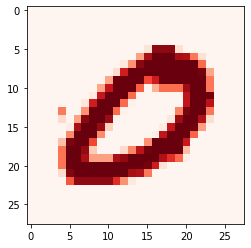

In [122]:
img = x_train_1000[5].reshape(28,28)
plt.imshow(img, cmap = "Reds")

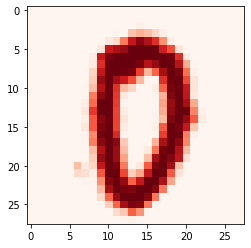

In [123]:
def rotate_img(img, angle):
    img_center = tuple(np.array(img.shape[1::-1])/2)
    rot_matrix = cv2.getRotationMatrix2D(img_center, angle, 1.0)
    res = cv2.warpAffine(img, rot_matrix, img.shape[1::-1], flags = cv2.INTER_LINEAR)
    return res

plt.imshow(rotate_img(img, 45), cmap="Reds");

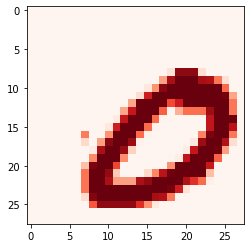

In [124]:
M = np.array([[1,0,10],[0,1,10]])
def shift_img(img, tx, ty):
    M = np.float32([[1,0,tx],[0,1,ty]])
    res = cv2.warpAffine(img, M, img.shape[1::-1])
    return res
plt.imshow(shift_img(img,3,3),cmap='Reds');

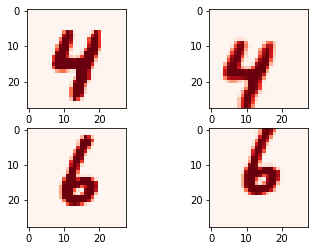

In [126]:
t = [-3,0,3]
d = [360-3, 360-2, 360-1, 1, 2, 3]

X_train_new = x_train_1000.copy()
X_test_new = x_test_1000.copy()
r = random.randint(0,1000)

for i in range(X_train_new.shape[0]):
    img = X_train_new[i].reshape(28,28)
    angle = random.sample(d,1)[0]
    tx,ty = random.sample(t, 2)
    
    img = rotate_img(img, angle)
    img = shift_img(img, tx, ty)
    if(i == r):
        plt.subplot(2,2,1)
        plt.imshow(X_train_new[r].reshape(28,28), cmap = 'Reds')
        plt.subplot(2,2,2)
        plt.imshow(img, cmap = 'Reds')

    X_train_new[i] = img.reshape(X_train_new[i].shape)

r = random.randint(0,1000)

for i in range(X_test_new.shape[0]):
    img = X_test_new[i].reshape(28,28)
    angle = random.sample(d,1)[0]
    tx,ty = random.sample(t, 2)

    img = rotate_img(img, angle)
    img = shift_img(img, tx, ty)
    if(i == r):
        plt.subplot(2,2,3)
        plt.imshow(X_test_new[r].reshape(28,28), cmap = 'Reds')
        plt.subplot(2,2,4)
        plt.imshow(img, cmap = 'Reds')

    X_test_new[i] = img.reshape(X_test_new[i].shape)

In [127]:
def CNN_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(16, (3,3), input_shape = (28,28,1), activation = 'relu',padding = 'same'))
    model.add(tf.keras.layers.Dropout(0.20))
    model.add(tf.keras.layers.MaxPooling2D(2,2))
    model.add(tf.keras.layers.Conv2D(16, (3,3), activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.20))
    model.add(tf.keras.layers.MaxPooling2D(2,2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.20))
    model.add(tf.keras.layers.Dense(10,activation = 'softmax'))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr = 0.01), metrics = ['accuracy'])

    return model

In [128]:
CNN = CNN_model()

In [129]:
def train_CNN(Network,x_train_1000,y_train_1000,x_test_1000,y_test_1000,epochs):
    Network_Acc = []
    Network_VAcc = []
    Network_Train_Loss = []
    Network_Train_VLoss = []
    Network_ConvL1_Chagne, Network_ConvL2_Chagne, Network_DenseL1_Chagne, Network_DenseL2_Chagne = [], [], [], []

    for e in range(epochs):
        ConvL1_Prev = np.array(Network.get_layer(index = 0).get_weights()[0])
        ConvL2_Prev = np.array(Network.get_layer(index = 3).get_weights()[0])
        DenseL1_Prev = np.array(Network.get_layer(index = 7).get_weights()[0])
        DenseL2_Prev = np.array(Network.get_layer(index = 9).get_weights()[0]) 

        History_1 = Network.fit(x = x_train_1000, y= y_train_1000, batch_size= 10, epochs=1, validation_data=(x_test_1000, y_test_1000))
        Network_Acc.append(History_1.history['accuracy'])
        Network_VAcc.append(History_1.history['val_accuracy'])
        Network_Train_Loss.append(History_1.history['loss'])
        Network_Train_VLoss.append(History_1.history['val_loss'])


        ConvL1_new = np.array(Network.get_layer(index = 0).get_weights()[0])
        ConvL2_new = np.array(Network.get_layer(index = 3).get_weights()[0])
        DenseL1_new = np.array(Network.get_layer(index = 7).get_weights()[0])
        DenseL2_new = np.array(Network.get_layer(index = 9).get_weights()[0])

        Avg_ConvL1_W_Change = np.average(np.absolute((ConvL1_Prev - ConvL1_new)/ConvL1_new))
        Avg_ConvL2_W_Change = np.average(np.absolute((ConvL2_Prev - ConvL2_new)/ConvL2_new))
        Avg_DenseL1_W_Change = np.average(np.absolute((DenseL1_Prev - DenseL1_new)/DenseL1_new))
        Avg_DenseL2_W_Change = np.average(np.absolute((DenseL2_Prev - DenseL2_new)/DenseL2_new))

        Network_ConvL1_Chagne.append(Avg_ConvL1_W_Change)
        Network_ConvL2_Chagne.append(Avg_ConvL2_W_Change)
        Network_DenseL1_Chagne.append(Avg_DenseL1_W_Change)
        Network_DenseL2_Chagne.append(Avg_DenseL2_W_Change)

        print(Avg_ConvL1_W_Change, Avg_ConvL2_W_Change, Avg_DenseL1_W_Change, Avg_DenseL1_W_Change)

    return [Network_Acc, Network_VAcc, Network_Train_Loss, Network_Train_VLoss, Network_ConvL1_Chagne, Network_ConvL2_Chagne, Network_DenseL1_Chagne, Network_DenseL2_Chagne]

In [130]:
CNN = CNN_model()

X_train_new = X_train_new.reshape(X_train_new.shape[0], 28,28,1)
X_test_new = X_test_new.reshape(X_test_new.shape[0], 28,28,1)

Results_7 = train_CNN(N7, X_train_new, y_train_1000, X_test_new, y_test_1000, 30)

Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.8323 - accuracy: 0.7800 - val_loss: 0.3860 - val_accuracy: 0.8810
0.18444632 0.111757 0.23706675 0.23706675
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5674 - accuracy: 0.8290 - val_loss: 0.4341 - val_accuracy: 0.8610
0.2720692 0.1521808 5.5466385 5.5466385
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4549 - accuracy: 0.8640 - val_loss: 0.4298 - val_accuracy: 0.8770
0.11470037 0.07955724 0.21437964 0.21437964
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3835 - accuracy: 0.8770 - val_loss: 0.3650 - val_accuracy: 0.8940
0.18104027 0.2504439 0.32936966 0.32936966
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 1s 1ms